# Intro to TensorFlow

https://www.youtube.com/watch?v=q5iL3XYFv2M

## Backpropagation on zero hidden layer classification case
Suppose we are required to learn the function that maps $x$ (the inputs) to $y$ (the outputs). In this particular instance we restrict ourselves to the case that $y=\sigma(Wx)$. The maths behind regression is shown below:
\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
where $\sigma(z_i) = 1/(1+exp(-z_i))$ is the sigmoid function. $a_i$ is commonly known as the activation. **The loss function** is $$\mathcal{L} = \frac{1}{2N}\sum_i (y_i-a_i)^2$$. 

**We need to adjust the $W$ to minimise the loss function**. We use the chain rule:
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot a_i(1-a_i)\cdot x_i
\end{align}

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/q5iL3XYFv2M?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


/home/maziyar/anaconda3/envs/tf2/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

%matplotlib inline

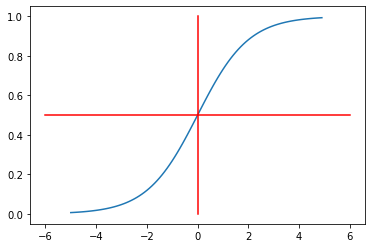

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-5,5,0.1)

plt.plot(z,sigmoid(z))
plt.plot([0,0],[0,1],'r')
plt.plot([-6,6],[0.5,0.5],'r')

In [4]:
N = 1000
D = 5

X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)

y[y<=0] = 0 
y[y>0] = 1

In [5]:
train_X = X[1:100]
test_X = X[100:]

In [6]:
X.shape

(1000, 5)

In [7]:
train_X.shape

(99, 5)

In [8]:
test_X.shape

(900, 5)

In [9]:
def dL_dw(X,e,a):
    return -X.T.dot(e*a*(1-a))/len(X)

def gradient_descent(gamma=5e-1, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,a)
        loss[i] = 0.5*e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

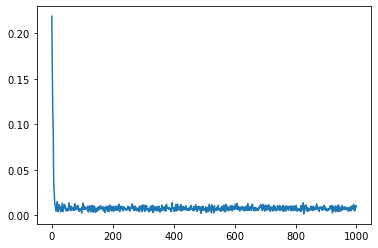

In [10]:
plt.plot(loss)

In [11]:
np.hstack([params[-1],w])

array([[-0.34022325, -0.42375968],
       [-0.38179346, -0.45341411],
       [-1.5158064 , -1.79564317],
       [-0.26698786, -0.33009019],
       [ 0.58082039,  0.73282908]])

In [12]:
idx = np.random.choice(len(X),20,replace=False)
a = sigmoid(X[idx].dot(w)) # Activation function
e = y[idx] - a
0.5*e.T.dot(e)/len(e)

array([[0.00948528]])

In [13]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
# y_inferred[y_inferred>0.5] = 1
# y_inferred[y_inferred<=0.5] = 0

# np.sum(y_test==y_inferred)

## Cross Entropy Error

We shall focus on doing the same as above with a different loss function, the Cross Entropy Loss function.
$$\mathcal{L} = -\frac{1}{N}\sum_i y_i\log(a_i)+(1-y_i)\log(1-a_i)$$.

The following remains the same:
\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
and the derivative,
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\right)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i-a_i}{a_i(1-a_i)}\right)\cdot a_i(1-a_i)\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot x_i
\end{align}

In [14]:
# from IPython.core.debugger import Tracer;

def dL_dw(X,e,a):
    return -X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-2, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    # NOTE: I initialised w such that its variance is 1/D
    w = np.random.randn(D,1)*(1/np.sqrt(D))
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)  
            w = w - gamma*dL_dw(X[idx],e,a)
#         
        loss[i] = -np.mean(y[idx]*np.log(a+1e-10)+(1-y[idx])*np.log(1-a+1e-10))
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

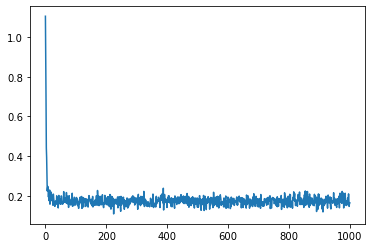

In [15]:
plt.plot(loss)

In [16]:
np.hstack([params[-1],w])

array([[-0.11711174, -0.42375968],
       [-0.11644926, -0.45341411],
       [-0.63267484, -1.79564317],
       [-0.131367  , -0.33009019],
       [ 0.20858427,  0.73282908]])

In [17]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

97

## Tensorflow Introduction

In [18]:
import tensorflow as tf

In [19]:
X.shape

(1000, 5)

In [23]:
train_X.shape

(99, 5)

In [26]:
def tf_train(X_train, y_train, batch_size=20):
    # Dataset (inputs and labels)
    x = tf.compat.v1.placeholder(tf.float32, [None, D])
    y_ = tf.compat.v1.placeholder(tf.float32, [None, 1])
    
    # random variable
    W = tf.Variable(tf.random.normal([D, 1],stddev=0.1))
    # map X to inferred output function
    a = tf.sigmoid(tf.matmul(x, W))

    # Define loss and optimizer
    cross_entropy = tf.reduce_mean(input_tensor=-(y_*tf.math.log(a)+(1-y_)*tf.math.log(1-a)))
    train_step = tf.compat.v1.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)
    
    sess = tf.compat.v1.InteractiveSession()
    tf.compat.v1.initialize_all_variables().run()
    # Train
    for epoch in range(1000):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))

In [28]:
tf.compat.v1.disable_eager_execution()

tf_train(X,y)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: 0.79079616
loss: 0.17373714
loss: 0.13240728
loss: 0.16038704
loss: 0.104678296
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan


In [31]:
def tf_train(X_train, y_train, batch_size=20, n_epoch=1000):
    x = tf.compat.v1.placeholder(tf.float32, [None, D])
    y_ = tf.compat.v1.placeholder(tf.float32, [None, 1])
    
    W = tf.Variable(tf.random.normal([D, 1],stddev=1/np.sqrt(D)))

    # Define loss and optimizer
    z = tf.matmul(x,W)

    cross_entropy = tf.reduce_mean(input_tensor=tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y_))
    train_step = tf.compat.v1.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.compat.v1.InteractiveSession()
    tf.compat.v1.initialize_all_variables().run()
    # Train
    for epoch in range(n_epoch):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
            
    return sess.run(W)

In [32]:
w_est = tf_train(X,y)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
loss: 0.82817715


/home/maziyar/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


loss: 0.12993214
loss: 0.1804026
loss: 0.185333
loss: 0.03280472
loss: 0.1189767
loss: 0.075235054
loss: 0.053363986
loss: 0.099958375
loss: 0.07475308


In [33]:
np.hstack([w_est,w])

array([[-0.28446072, -0.42375968],
       [-0.34989649, -0.45341411],
       [-1.35862863, -1.79564317],
       [-0.23279138, -0.33009019],
       [ 0.5114302 ,  0.73282908]])

In [34]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(w_est)) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

98